# Group 6 EDA Project
## Completed By: Sam Robinson, Darren Black, and Christopher Mcteague 
### Table Of Contents 
- Introduction
- Import Packages And Data
- Inspect Data Frame Structure 
- Check For Null Values
- Vizualize Data
- Result Section

## Business Problem Statement

Swire Coca-Cola incurs an annual loss of approximately $60 million due to machine downtimes. Currently, workers are deployed reactively to fix broken machines, but this process is slow and limits productivity. The goal of the exploratory data analysis (EDA) below is to better understand the provided data, which will help our team implement a predictive model. By developing a model that alerts workers to machines with a high probability of malfunctioning before incidents occur, we can reduce downtime and increase overall productivity.

## Import Packages And Data Set

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import openpyxl 
import seaborn as sns
import missingno as msno
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('C:/Users/darre/Downloads/IWC_Work_Orders_Extract.csv',low_memory=False)

## Inspect Data Frame Structure

In [3]:
# show Data Frame
df.head()

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,NaN,NaN,...,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31


In [4]:
# Describe Data Frame
df.describe(include='all')

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
count,1.427264e+06,1427264,1427264,1427264,1427264,1427264,1427264,1.427264e+06,152594,152594.000000,...,282407,258691,237573,2180,2.917950e+05,79447,79447,79447,79447,79447
unique,NaN,6,6,2956,2956,65927,61388,NaN,3308,NaN,...,67,141,86,36,NaN,807,4,92,137,1
top,NaN,G261,SILVERSTONE,2019-04-16,2019-04-16,00:00:00.000,00:00:00.000,NaN,000000022943,NaN,...,CAN LINE,LINE #4-FILLER_ROTARY_CAN,FILLER,FULL CAN TO ACCUMULATION TABLE,NaN,L1 FILLER_ROTARY_CAN_72_VALVE,Machines,2017-02-15,2017-02-15,9999-12-31
freq,NaN,630903,630903,936,934,212155,202920,NaN,1327,NaN,...,34208,35834,46322,251,NaN,3745,79224,53650,32713,79447
mean,4.561470e+10,NaN,NaN,NaN,NaN,NaN,NaN,8.862968e+01,NaN,115846.807954,...,NaN,NaN,NaN,NaN,3.002609e+08,NaN,NaN,NaN,NaN,NaN
std,8.387114e+10,NaN,NaN,NaN,NaN,NaN,NaN,8.037915e+02,NaN,71325.255687,...,NaN,NaN,NaN,NaN,5.581645e+06,NaN,NaN,NaN,NaN,NaN
min,1.000219e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,39801.000000,...,NaN,NaN,NaN,NaN,2.000871e+08,NaN,NaN,NaN,NaN,NaN
25%,4.022602e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+01,NaN,41046.000000,...,NaN,NaN,NaN,NaN,3.000092e+08,NaN,NaN,NaN,NaN,NaN
50%,7.044271e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.800000e+01,NaN,112995.000000,...,NaN,NaN,NaN,NaN,3.000178e+08,NaN,NaN,NaN,NaN,NaN
75%,1.002343e+09,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+01,NaN,134702.000000,...,NaN,NaN,NaN,NaN,3.000269e+08,NaN,NaN,NaN,NaN,NaN


What is the shape of our data?

In [5]:
pd.set_option("display.max.columns", None)
df.shape

(1427264, 25)

What categories do we have in our different columns? And how is the data divided between them?

In [6]:
# explore types of maintenance
maintenance_type = df['MAINTENANCE_ACTIVITY_TYPE'].value_counts()
print(maintenance_type) 

MAINTENANCE_ACTIVITY_TYPE
Unplanned    1276877
Planned       150387
Name: count, dtype: int64


In [7]:
#what percent of the file contains planned maintance vs unplanned
print('Percent Planned:',len(df[df.MAINTENANCE_ACTIVITY_TYPE == 'Planned'])/len(df))
print('Percent Unplanned:',len(df[df.MAINTENANCE_ACTIVITY_TYPE == 'Unplanned'])/len(df))

Percent Planned: 0.10536733218241334
Percent Unplanned: 0.8946326678175867


In [8]:
print(df['FUNCTIONAL_AREA_NODE_1_MODIFIED'].value_counts())

FUNCTIONAL_AREA_NODE_1_MODIFIED
COTA PRODUCTION           70187
SILVERSTONE PRODUCTION    62625
PRODUCTION                60312
MONZA PRODUCTION          57458
SUZUKA PRODUCTION         36713
COOLER SERVICE             2699
FLEET                       123
Name: count, dtype: int64


In [9]:
print(df['FUNCTIONAL_AREA_NODE_2_MODIFIED'].value_counts())

FUNCTIONAL_AREA_NODE_2_MODIFIED
CAN LINE                      34208
BTL_PET_LINE                  32789
LINES 1,2,9 - BOTTLE LINES    29729
BOTTLE LINE                   27543
LINES 3,4,10 - CAN LINES      23153
                              ...  
CHEMICAL ROOM                    14
ELECTRICAL SYSTEMS               14
G812 SANITATION                   3
OZONE SYSTEMS                     1
LIS SYSTEM                        1
Name: count, Length: 67, dtype: int64


In [10]:
print(df['FUNCTIONAL_AREA_NODE_3_MODIFIED'].value_counts())

FUNCTIONAL_AREA_NODE_3_MODIFIED
LINE #4-FILLER_ROTARY_CAN       35834
LINE #2 - FILLER_ROT_BTL_PET    23027
LINE #1 - FILLER_ROT_BTL_PET    18290
LINE #1-CAN_LINE                17844
LINE #2 - BOTTLE_LINE_PET       17774
                                ...  
SANITATION                          1
ELECTRICAL SYSTEMS REFRIG           1
G811 PAINTING EXT                   1
FLEET                               1
FIRST AID                           1
Name: count, Length: 141, dtype: int64


In [11]:
print(df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts())

FUNCTIONAL_AREA_NODE_4_MODIFIED
FILLER                      46322
PACKER                      35230
CONVEYOR                    34765
LABELER                     18945
PALLETIZER                  16239
                            ...  
MIXERS                          1
BATCH STATION METER SKID        1
G811 CONDENSATE RETURN          1
CIP TANK SKID                   1
CIP VALVE MATRIX SKID           1
Name: count, Length: 86, dtype: int64


In [12]:
print(df['FUNCTIONAL_AREA_NODE_5_MODIFIED'].value_counts())

FUNCTIONAL_AREA_NODE_5_MODIFIED
FULL CAN TO ACCUMULATION TABLE              251
PACKER 1, MODEL DUODOZEN 1250SX             210
FULL CASE CONVEYORS                         158
EMPTY CASE CONVEYORS                        136
FULL CASE SPIRAL TO PALLETIZER              125
FB CONVEYORS TO DOUGLAS/HI-CONE SPLIT       114
EMPTY CAN                                   110
COMPRESSOR                                  110
PACKER 2, MODEL FENIX 185V                  108
FULL CASE CONVEYOR                          101
EAST SYRUP TANKS                             98
FULL BOTTLE CONVEYORS                        97
EMPTY CAN CONVEYOR                           90
*OLD SYSTEM MT CASE CONVEYORS*               56
LOOSE FB TO PACKER CONVEYORS                 52
FULL CAN CONVEYOR                            50
EVANS COOLING TUNNEL L3, INSIDE BUILDING     48
HARTNESS TO PAI FULL CASE CONVEYORS          47
PARTIAL CASES GPI (RIVERWOOD) TO DOUGLAS     43
INFEED TO HICONE TO PACKER                   33
EMPTY CA

In [13]:
print(df['EQUIPMENT_ID'].value_counts())

EQUIPMENT_ID
300025792.0    4583
300017655.0    4216
300115000.0    3745
300026891.0    3054
300017654.0    2913
               ... 
300045132.0       1
300197606.0       1
300230442.0       1
300227026.0       1
300017669.0       1
Name: count, Length: 2956, dtype: int64


Overall, the above not only allows us to see the shape of all the categorical data but also see their frequency. For example we can see that most tickets come from the Can Line and the most commonly replaced equipment ID is 3000257920. This kind of information will be valuable when creating our models to see how much these categories effect the outcome of what we looking into. In addition, it might be good to make sure that we still have the same ratio of these categories if we need to remove data.

## Checking For Percent Of Null Values Per Column

What percent of null values appear in each column?

In [14]:
# Calculate The Pecrentage Of Missing Values In Each Column
null_percentage_list = df.isnull().mean() * 100

# Filter columns with more than 0% null values and sort them
null_percentage_list = null_percentage_list[null_percentage_list > 0].sort_values(ascending=False)

# Create a list of tuples with column name and percentage of null values
null_percentage_list_formatted = [(col, round(percent, 2)) for col, percent in null_percentage_list.items()]

# Display the list
for col, percent in null_percentage_list_formatted:
    print(f"Column: {col}, Null Percentage: {percent}%")

Column: FUNCTIONAL_AREA_NODE_5_MODIFIED, Null Percentage: 99.85%
Column: EQUIPMENT_DESC, Null Percentage: 94.43%
Column: EQUIP_CAT_DESC, Null Percentage: 94.43%
Column: EQUIP_START_UP_DATE, Null Percentage: 94.43%
Column: EQUIP_VALID_FROM, Null Percentage: 94.43%
Column: EQUIP_VALID_TO, Null Percentage: 94.43%
Column: MAINTENANCE_PLAN, Null Percentage: 89.31%
Column: MAINTENANCE_ITEM, Null Percentage: 89.31%
Column: FUNCTIONAL_AREA_NODE_4_MODIFIED, Null Percentage: 83.35%
Column: FUNCTIONAL_AREA_NODE_3_MODIFIED, Null Percentage: 81.88%
Column: FUNCTIONAL_AREA_NODE_2_MODIFIED, Null Percentage: 80.21%
Column: FUNCTIONAL_AREA_NODE_1_MODIFIED, Null Percentage: 79.67%
Column: ORDER_DESCRIPTION, Null Percentage: 79.56%
Column: FUNCTIONAL_LOC, Null Percentage: 79.56%
Column: MAINTENANCE_TYPE_DESCRIPTION, Null Percentage: 79.56%
Column: EQUIPMENT_ID, Null Percentage: 79.56%


<Axes: >

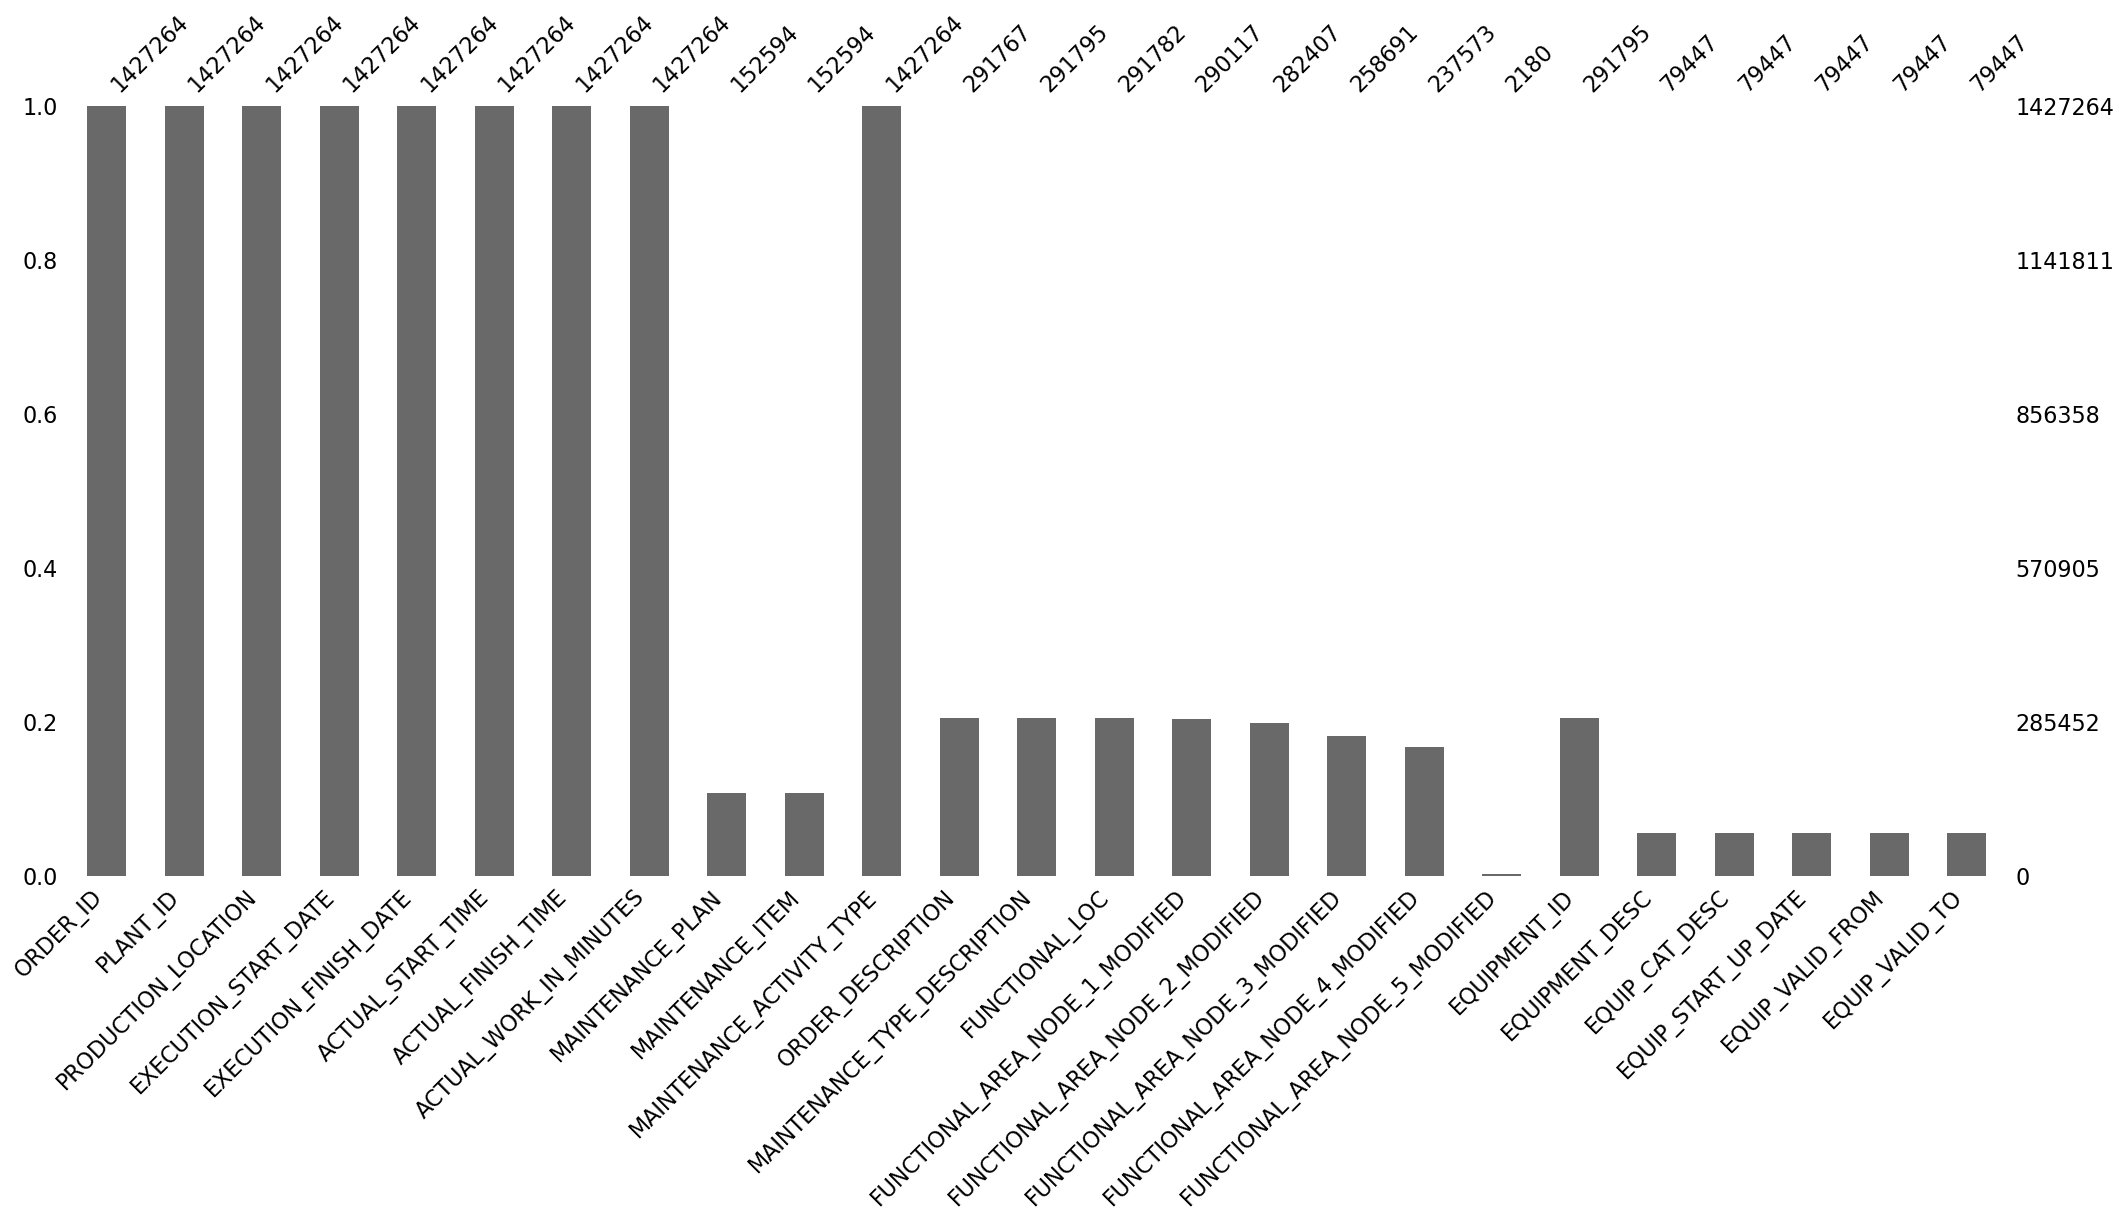

In [15]:
msno.bar(df)

How can we handle all the missing data?

As shown above, **16 out of 25 columns** are missing over **70%** of their row values. To address this, we will likely remove columns with more than **90% missing values**. However, the other columns will remain untouched because they contain valuable information, such as details on the equipment used to fix the machine or whether the fix was preplanned. Despite having over 70% of their data missing, these columns could still prove useful for analysis in the future. In fact, if we break the data down by planned vs unplanned maintence many of our columns that have large amount of missing data drastically increase in their ratios.

In [16]:
df[(df['MAINTENANCE_PLAN'].isnull()) & (df['MAINTENANCE_ITEM'].isnull()) & (df['ORDER_DESCRIPTION'].isnull()) & (df['MAINTENANCE_TYPE_DESCRIPTION'].isnull())
          & (df['FUNCTIONAL_LOC'].isnull()) & (df['FUNCTIONAL_AREA_NODE_1_MODIFIED'].isnull()) & (df['FUNCTIONAL_AREA_NODE_1_MODIFIED'].isnull()) & (df['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isnull())
           & (df['FUNCTIONAL_AREA_NODE_3_MODIFIED'].isnull())  & (df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].isnull()) & (df['FUNCTIONAL_AREA_NODE_5_MODIFIED'].isnull())
              & (df['EQUIPMENT_ID'].isnull()) & (df['EQUIPMENT_DESC'].isnull()) & (df['EQUIP_CAT_DESC'].isnull()) & (df['EQUIP_START_UP_DATE'].isnull())
                & (df['EQUIP_VALID_FROM'].isnull()) & (df['EQUIP_VALID_TO'].isnull()) & (df.MAINTENANCE_ACTIVITY_TYPE != 'Planned')]

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
6034,170001008392,G221,SUZUKA,2020-02-04,2020-02-05,10:00:00.000,00:00:00.000,840.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6035,170001566572,G221,SUZUKA,2021-08-02,2021-08-02,21:13:00.000,22:12:00.000,59.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6036,170001597081,G221,SUZUKA,2021-08-28,2021-08-29,23:00:00.000,00:30:00.000,90.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,702741815,G816,COTA,2021-02-26,2021-02-26,07:00:00.000,07:00:00.000,43.2,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,200001051836,G291,MONZA,2018-09-20,2018-09-20,18:00:00.000,19:21:00.000,81.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421435,170002178497,G261,SILVERSTONE,2024-05-06,2024-05-06,04:10:00.000,04:40:00.000,30.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421436,704638942,G291,MONZA,2023-04-19,2023-04-19,07:00:00.000,07:00:00.000,90.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421437,401336898,G261,SILVERSTONE,2020-11-18,2020-11-18,17:21:00.000,17:58:00.000,37.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421438,100000450665,G261,SILVERSTONE,2022-08-03,2022-08-03,14:30:00.000,16:54:00.000,120.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If we plan on predicting if an when equipment will break, the most important information we can look at it is unplanned maintence. Above we look into unplanned maintence tickets that don't have any equipment ID and has a bunch of other missing values. Its in our opinion that because these orders are missing so much data they won't be helpful in predicting when equipment will break. So, it is possible that we will simply remove these rows instead of entire columns.

How important are each of our fields and what correlations?

Since we haven't fully identified each of our target variables that we would like to create our ML models around we will be looking at each fields relation to "ACTUAL_WORK_IN_MINUTES". If we us this field as our target we can at very least get good estimates to how long maintenance will take on particular machines.

In [28]:
#The below code will use a random forest classification model to arrange each field/feature to its importance to the target varaible, in this case ACTUAL_WORK_IN_MINUTES.
df_encoded = pd.get_dummies(df, columns=['PLANT_ID','MAINTENANCE_ACTIVITY_TYPE','MAINTENANCE_TYPE_DESCRIPTION','FUNCTIONAL_AREA_NODE_1_MODIFIED',
                        'FUNCTIONAL_AREA_NODE_2_MODIFIED','FUNCTIONAL_AREA_NODE_2_MODIFIED','FUNCTIONAL_AREA_NODE_3_MODIFIED','FUNCTIONAL_AREA_NODE_4_MODIFIED','FUNCTIONAL_AREA_NODE_5_MODIFIED',
                         'EQUIPMENT_ID'])

model = RandomForestRegressor()
X = df_encoded.drop(['ACTUAL_WORK_IN_MINUTES','PRODUCTION_LOCATION','ORDER_ID','EXECUTION_START_DATE','EXECUTION_FINISH_DATE','ACTUAL_START_TIME','ACTUAL_FINISH_TIME','MAINTENANCE_PLAN'
                    ,'MAINTENANCE_ITEM','ORDER_DESCRIPTION','FUNCTIONAL_LOC','EQUIPMENT_DESC','EQUIP_CAT_DESC','EQUIP_START_UP_DATE','EQUIP_VALID_FROM','EQUIP_VALID_TO'], axis=1)

y = df_encoded['ACTUAL_WORK_IN_MINUTES']
model.fit(X, y)

importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

## Vizualize Data

What orders description had the largest contribution to work in minuites?

In [18]:

# Group by Order Description and calculate the average
grouped_df = df.groupby('ORDER_DESCRIPTION')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Sort the DataFrame in descending order based on the average
sorted_df = grouped_df.sort_values(by='ACTUAL_WORK_IN_MINUTES', ascending=False)

# Get the top 10 entries
top_20_df = sorted_df.head(20)

top_20_df


,ORDER_DESCRIPTION,ACTUAL_WORK_IN_MINUTES
38418,ESTOPRELAYS/VARIOUS SERCRO ISSUES START,107420.4
77791,REBUILD HAND VALVE ON SYRUP INLET,15168.0
77676,REBUILD COMPRESSOR # 6,11430.0
87081,REPLACE SEPERATORS IN EAST AIR COMP.,11040.0
117010,WORKED ON DOUGLAS REBUILD FOR APPROX. 3,10219.2
92911,REPLACED GRIPPERS,9780.0
112173,Troubleshooting botom deform carton,9483.0
49878,INSTALL L3 LABELERS,9360.0
74491,PLEASE ORDER LOW LEVEL ALARM SWITCH KITS,9055.2
38729,EXTEND CATWALK TO ACCOMMODATE NEW LADDER,8760.0


What plant had the highest count of maintence items by planned and unplanned events?

In [19]:
# seperate data sets into planned and unplanned
df_unplanned = df[df['MAINTENANCE_ACTIVITY_TYPE']=='Unplanned'] 
df_planned = df[df['MAINTENANCE_ACTIVITY_TYPE']=='Planned']

Text(0.5, 1.0, 'Unplanned Maintenance Events per Plant')

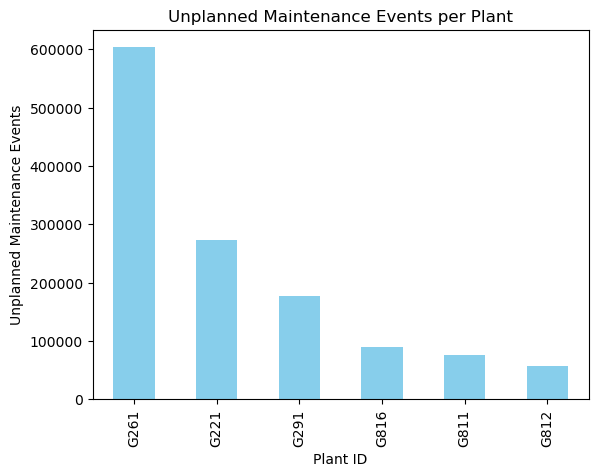

In [20]:
# plot unplanned maintenence by plant
plantcounts_unplanned = df_unplanned['PLANT_ID'].value_counts()
plantcounts_unplanned.plot(kind='bar',color='skyblue') 
plt.xlabel("Plant ID")
plt.ylabel("Unplanned Maintenance Events")
plt.title("Unplanned Maintenance Events per Plant")

Plot provides interesting visualization of the amount of maintenance being carried out at each plant. Plant G261 clearly where the most value could come from improvements in malfunction identification. 

Text(0.5, 1.0, 'Planned Maintenance Events per Plant')

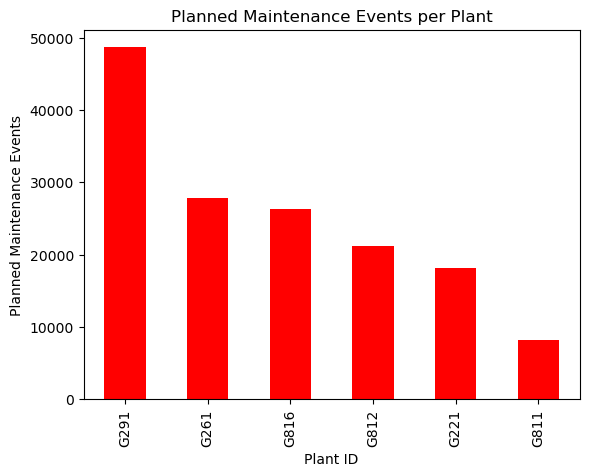

In [21]:
# plot planned maintenence by plant
plantcounts_planned = df_planned['PLANT_ID'].value_counts()
plantcounts_planned.plot(kind='bar',color='red') 
plt.xlabel("Plant ID")
plt.ylabel("Planned Maintenance Events")
plt.title("Planned Maintenance Events per Plant")

When it comes to planned maintenance it is not the plant that experiences the most unplanned issues that is also carrying out the most planned repairs. Could potentially be some correlation there.

What plant on average had the longest actual work in minutes?

In [22]:
# Grouped_ID 
grouped_id = df.groupby('PLANT_ID')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Sorted ID
# Sort the DataFrame in descending order based on the average
sorted_id = grouped_id.sort_values(by='ACTUAL_WORK_IN_MINUTES', ascending=False)

# Show Sorted ID
sorted_id

,PLANT_ID,ACTUAL_WORK_IN_MINUTES
0,G221,100.328048
2,G291,94.765588
1,G261,94.086904
3,G811,65.742548
5,G816,60.720869
4,G812,50.140030


What do the individual work in minutes look like at each plant? Are there outliers?

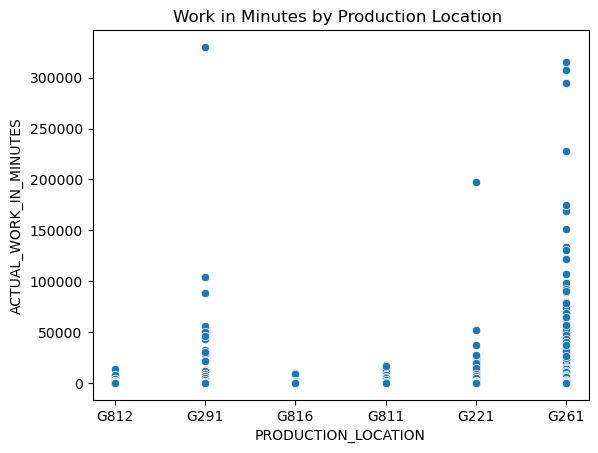

In [23]:
sns.scatterplot(data= df, y='ACTUAL_WORK_IN_MINUTES', x='PLANT_ID')

plt.title('Work in Minutes by Production Location ')
plt.xlabel('PRODUCTION_LOCATION')
plt.ylabel('ACTUAL_WORK_IN_MINUTES')

plt.show()

Above we can clearly see outliers where are particular issue took more than 300,000 minutes to fix. This seems pretty crazy. Is it possible that the ticket got forgotten and thus got closed way after the issue was resolved?

What equipment had the most malfunctions/broke down the most?

EQUIPMENT_ID
300025792.0    3801
300115000.0    3120
300017655.0    2930
300017654.0    2880
300026891.0    2783
300009177.0    2104
300017247.0    1710
300009199.0    1704
300017248.0    1380
300009114.0    1313
300224440.0    1210
300017312.0    1191
300019388.0    1148
300224439.0    1103
300033692.0    1049
300001505.0    1043
300026804.0    1032
Name: count, dtype: int64


Text(0.5, 1.0, 'Most Frequent Unplanned Equipment Malfunctions')

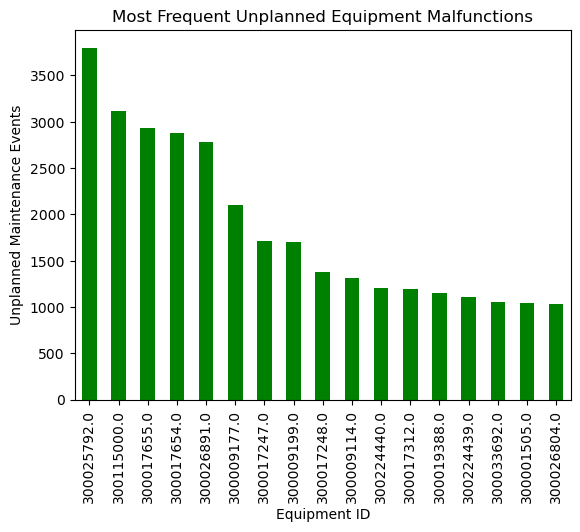

In [24]:
# plot most frequent equipment malfunctions
equip_ID_counts_unplanned = df_unplanned['EQUIPMENT_ID'].value_counts()
filtered_counts = equip_ID_counts_unplanned[equip_ID_counts_unplanned > 1000]
print(filtered_counts)
filtered_counts.plot(kind='bar',color='green') 
plt.xlabel("Equipment ID")
plt.ylabel("Unplanned Maintenance Events")
plt.title("Most Frequent Unplanned Equipment Malfunctions")

This plot shows the number of unplanned maintenance events taking place in association with a malfuntion in a particular piece of equipment. There are hundreds of peices of equipment with a single work orders, so this plot narrows down that value to approximately the top 15 sources of unplanned issues. Improving these numbers at all would be hugely important to the success of this project.

What the average amount of time it takes to repair each equipement type?

In [26]:
# generate average repair times for the most frequently broken pieces of equipment
filtered_counts = equip_ID_counts_unplanned[equip_ID_counts_unplanned > 1000]
ids_to_keep = filtered_counts.index
worktime_equipid = df_unplanned[df_unplanned['EQUIPMENT_ID'].isin(ids_to_keep)]
worktime_equipid_grouped = worktime_equipid.groupby('EQUIPMENT_ID')['ACTUAL_WORK_IN_MINUTES'].mean()
print(worktime_equipid_grouped)

EQUIPMENT_ID
300001505.0    160.107958
300009114.0    149.612947
300009177.0    178.558460
300009199.0    146.870423
300017247.0    152.348421
300017248.0    140.464783
300017312.0    201.442821
300017654.0    139.651250
300017655.0    111.770785
300019388.0    247.861150
300025792.0    114.049250
300026804.0     83.001744
300026891.0     88.643694
300033692.0     88.279504
300115000.0     94.478462
300224439.0    101.269447
300224440.0     73.680000
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64


Text(0.5, 1.0, 'Average Unexpected Repair Time for Most Common Equipment Malfunctions')

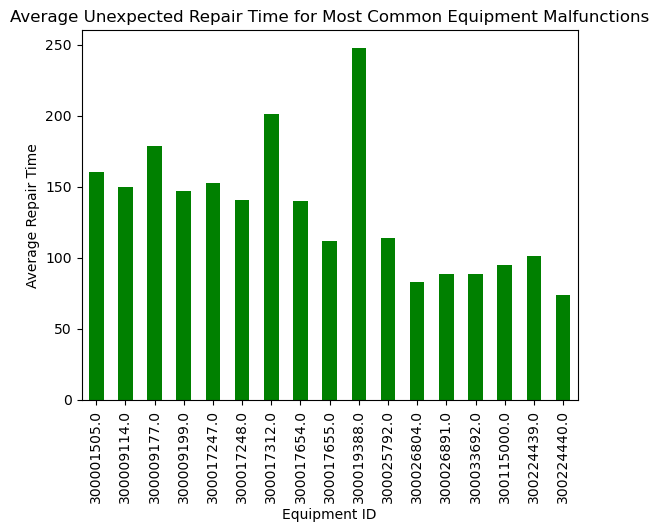

In [27]:
# plot average amount of time it takes to repair most common malfunctions
worktime_equipid_grouped.plot(kind='bar',color='green')
plt.xlabel("Equipment ID")
plt.ylabel("Average Repair Time")
plt.title("Average Unexpected Repair Time for Most Common Equipment Malfunctions")

This plot represents the average amount of time that is required to repair the most frequently broken pieces of equipment within Swire Coca-Cola's production plants. This not only provides us with insight into what the most time-costly malfunctions are for the company, but also which key pieces of equipment to have spare versions of in order to reduce the amount of time spent on the repairs and ultimately not producing product. 

What are our most frequent unplanned equipement malfunctions?

EQUIPMENT_DESC
L1 FILLER_ROTARY_CAN_72_VALVE             3120
L3 PACKR_CASE_WESTROCK_DD1250M            1049
L2 FILLER_ROTARY_BTL_45_VALVE             1043
L2 LABELER_BOTTLE_TRINE 4600_#1            848
L1 FILLER_ROTARY_BTL_60_VALVE              794
L1 PACKR_CASE_WESTROCK_DD1250M             782
L3 PACKER_CASE_TRAY_DOUGLAS                773
L2 LABELER_BOTTLE_TRINE 4600_#2            684
L3 FILLER_ROTARY_BTL_100_VALVE             579
L4 FILLER_ROTARY_CAN_100_VALVE             487
L2 LINE 2 FILLER                           354
LINE 1 LABELER_ROTARY                      327
L2 PALLETIZER_LINE 2_PAI                   316
L1 HEATER_WATER_GAS_DIRECT_FIRE_WARMER     312
L3 PACKER KHS TSP80V                       289
L3 FILLER_ROTARY_CAN_124_VALVE             284
L2 LABELER_LINEAR_BTL_TRINE_WEST_4600G     273
CAN LINE 3 GPI PACKER                      262
L1 / L2 PALLETIZER_ELECPNEU                259
L2 PALLETIZER_T-TEK_TS-0075                235
L3 LABELER_ROTARY                          22

Text(0.5, 1.0, 'Most Frequent Unplanned Equipment Malfunctions')

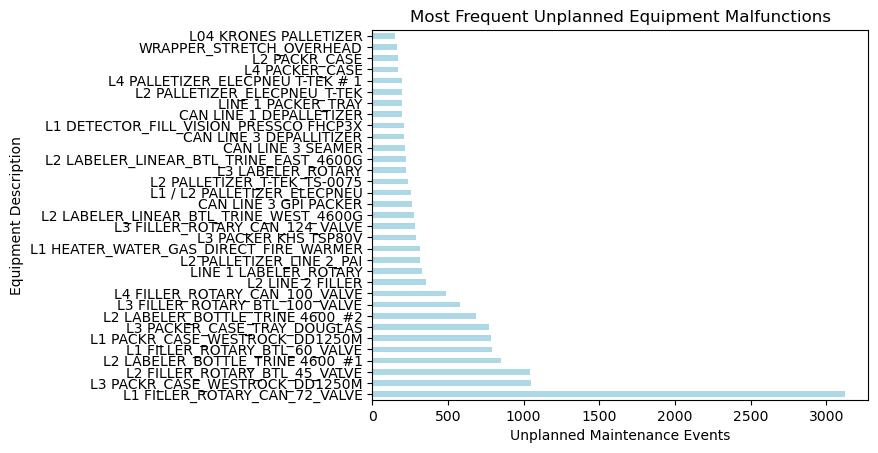

In [ ]:
# plot most frequent equipment malfunctions
equip_desc_counts_unplanned = df_unplanned['EQUIPMENT_DESC'].value_counts()
filtered_counts_equip_desc = equip_desc_counts_unplanned[equip_desc_counts_unplanned > 150]
print(filtered_counts_equip_desc)
filtered_counts_equip_desc.plot(kind='barh',color='lightblue') 
plt.xlabel("Unplanned Maintenance Events")
plt.ylabel("Equipment Description")
plt.title("Most Frequent Unplanned Equipment Malfunctions")

## Result Section

Our exploratory data analysis has revealed valuable insights into plant performance, identifying those with the highest repair counts and the longest average repair times. This information is key to understanding which plants are most impacted by repair-related delays. We also uncovered the specific order descriptions associated with the longest repair durations.

By analyzing this data, we can pinpoint which plants face the most significant repair latency issues and which types of orders contribute to prolonged repair times. Additionally, we identified the equipment that breaks down most frequently and the average time required for repairs. These insights, along with other findings from the dataset, will help shape our data model around critical target variables, such as 'ACTUAL_WORK_IN_MINUTES.'

Our review of null values has also clarified potential columns or rows that may need to be removed. Overall, our EDA has greatly enhanced our understanding of the data, providing a strong foundation for developing predictive models.